# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 6
label_name = "stat4"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 6.375994801521301
Epoch 1, Loss 6.324041187763214
Epoch 2, Loss 6.25450587272644
Epoch 3, Loss 6.192584753036499
Epoch 4, Loss 6.126560866832733
Epoch 5, Loss 6.057735741138458
Epoch 6, Loss 5.987714886665344
Epoch 7, Loss 5.930678606033325
Epoch 8, Loss 5.876051843166351
Epoch 9, Loss 5.82277649641037
Epoch 10, Loss 5.769254505634308
Epoch 11, Loss 5.72603166103363
Epoch 12, Loss 5.675432026386261
Epoch 13, Loss 5.6267863512039185
Epoch 14, Loss 5.589658319950104
Epoch 15, Loss 5.544261395931244
Epoch 16, Loss 5.501570701599121
Epoch 17, Loss 5.4655357003211975
Epoch 18, Loss 5.421085834503174
Epoch 19, Loss 5.383118987083435
Epoch 20, Loss 5.348572731018066
Epoch 21, Loss 5.312409222126007
Epoch 22, Loss 5.271060824394226
Epoch 23, Loss 5.238219320774078
Epoch 24, Loss 5.203407108783722
Epoch 25, Loss 5.167948424816132
Epoch 26, Loss 5.134049236774445
Epoch 27, Loss 5.0983505845069885
Epoch 28, Loss 5.070258677005768
Epoch 29, Loss 5.034592568874359
Epoch 30, Loss 5.005

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

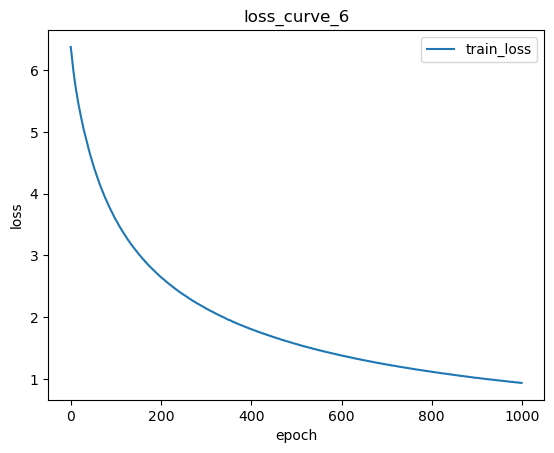

In [5]:
plt.figure()
plt.plot(losses, label='train_loss')
plt.title(f'loss_curve_{n}')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig(f'figures/{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[373, 0], [0, 203]]
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


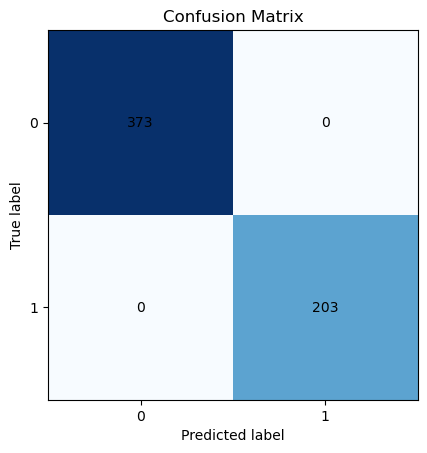

In [6]:
confustion_matrix = evaluate_model(model, training_dataset)
print(confustion_matrix)
confustion_matrix.print_accuracy()
confustion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

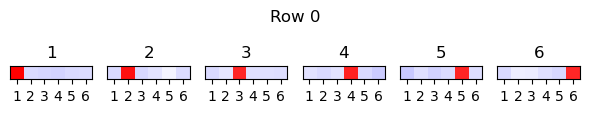

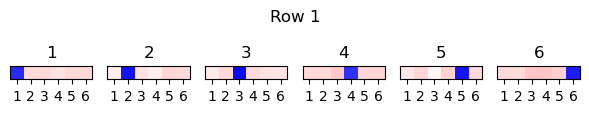

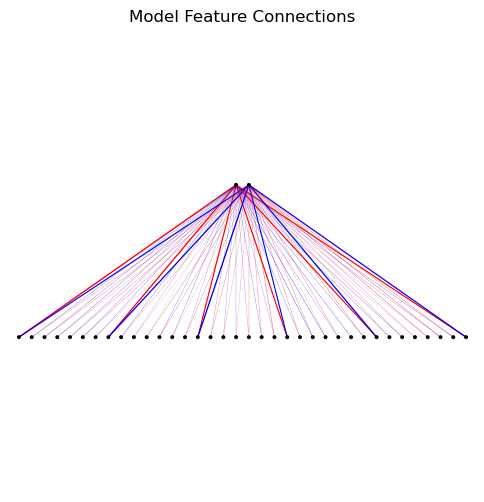

In [7]:
for i in range(len(layers)):
    for index in range(model.layers[i].weight.shape[0]):
        model.plot_heatmap_feature(i, index)
model.plot_connections()